# Race Chart using web-scraped data

In [1]:
from JSAnimation.IPython_display import display_animation
import urllib
import pandas as pd
import numpy as np

In [3]:
# Get data
url_companies = 'https://companiesmarketcap.com/usa/largest-companies-in-the-usa-by-market-cap/'

In [4]:
# Data cleaning
companies_list = []

for i in range(9):
    companies_list.append(pd.read_html(url_companies)[0]['Name'][i].split(' ')[0].lower())

In [5]:
companies_list = ['alphabet-google' if x == 'alphabet' else x for x in companies_list]

In [6]:
companies_list = ['berkshire-hathaway' if x == 'berkshire' else x for x in companies_list]

In [7]:
final_data = pd.DataFrame()

for i in companies_list:
    
    url_tables = 'https://companiesmarketcap.com/' + i + '/marketcap/'
    tables = pd.read_html(url_tables)
    data = tables[0]
    data['Company'] = i.title()
    final_data = pd.concat([final_data, data], axis = 0)
    

In [8]:
final_data.head()

,Year,Market cap,Change,Company
0,2021,$2.456 T,8.88%,Apple
1,2020,$2.255 T,75.2%,Apple
2,2019,$1.287 T,72.59%,Apple
3,2018,$746.07 B,-13.34%,Apple
4,2017,$860.88 B,41.37%,Apple


In [9]:
final_data.drop(columns = "Change", inplace = True )

In [10]:
#Convert Market Cap to numbers
final_data['LastDigit'] = [x.strip()[-1] for x in final_data['Market cap']]

In [11]:
final_data['LastDigit'].value_counts()

B    138
T     11
Name: LastDigit, dtype: int64

In [12]:
final_data.head()

,Year,Market cap,Company,LastDigit
0,2021,$2.456 T,Apple,T
1,2020,$2.255 T,Apple,T
2,2019,$1.287 T,Apple,T
3,2018,$746.07 B,Apple,B
4,2017,$860.88 B,Apple,B


In [13]:
final_data["Market cap"] = final_data["Market cap"].str.extract('(\d+\.*\d+)')

In [14]:
final_data["Market cap"] = pd.to_numeric(final_data["Market cap"])

In [15]:
final_data['Market cap'] = np.where(final_data['LastDigit'] == 'T', final_data["Market cap"]*1000000000000, final_data["Market cap"]*1000000000)

In [16]:
final_data.drop(columns = "LastDigit", inplace=True)

In [17]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML

In [18]:
final_data = final_data.sort_values(['Year'],ascending = True)

In [19]:
final_data.head()

,Year,Market cap,Company
20,2001,3.580500e+11,Microsoft
20,2001,4.030000e+09,Amazon
20,2001,6.440000e+09,Nvidia
20,2001,1.155600e+11,Berkshire-Hathaway
20,2001,7.710000e+09,Apple


In [20]:
# function to create race chart
def draw_barchart(current_year):
    
    colors = dict(zip(
    list(final_data['Company'].unique()),
    ['#adb0ff', '#ffb3ff', '#90d595', '#e48381', '#aafbff', '#f7bb5f', '#eafb50', '#2BA4E1', '#E5402C']
))

    final_data2 = final_data[final_data['Year'].eq(current_year)].sort_values(by='Market cap', ascending=False).head(5)
    ax.clear()
    ax.barh(final_data2['Company'], final_data2['Market cap']/1000000000,color=[colors[x] for x in final_data2['Company']])
    dx = final_data2['Market cap'].max() / 1000
    for i, (value, name) in enumerate(zip(final_data2['Market cap'], final_data2['Company'])):
        ax.text((value-dx)/1000000000, i,     name,           size=14, weight=600, ha='right', va='bottom')
        ax.text((value+dx)/1000000000, i,     f'{value/1000000000:,.0f}',  size=14, ha='left',  va='center')
    ax.text(1, 0.4, current_year, transform=ax.transAxes, color='#777777', size=46, ha='right', weight=800)
    ax.text(0, 1.06, 'Market cap (billions)', transform=ax.transAxes, size=12, color='#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.15, 'Top 5 Companies with the Highest Market Cap from 2001 to 2021',
            transform=ax.transAxes, size=24, weight=600, ha='left', va='top')
    plt.box(False)

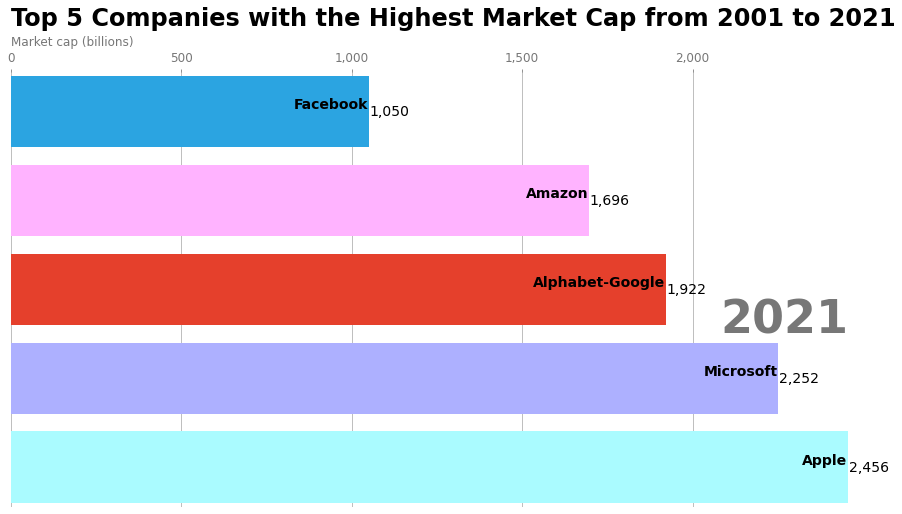

In [35]:
fig, ax = plt.subplots(figsize=(15, 8))
animator = animation.FuncAnimation(fig, draw_barchart, frames=range(2001, 2022))
video = HTML(animator.to_jshtml(fps=2))

In [38]:
video